In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import scipy as sp
import math
import copy
from matplotlib import pyplot as plt
from dataclasses import dataclass
from tqdm import tqdm

from test_sampler import TestProblem, TestProblem2
from optimize_algos import test_algo_by_problem, ACRCD, ACRCD_star

In [3]:
problem_1 = TestProblem()

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jul 09 03:00:04 PM: Your problem has 200 variables, 0 constraints, and 0 parameters.
(CVXPY) Jul 09 03:00:04 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 09 03:00:04 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 09 03:00:04 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 09 03:00:04 PM: Compiling problem (target solver=SCS).
(CVXPY) Jul 09 03:00:04 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

# Вторая задача (решается аналитически)
## ACRCD - правильные L

In [4]:
problem_2 = TestProblem2(La=100, Lb=10)

100%|██████████| 5000/5000 [00:02<00:00, 2481.39it/s]


start f val:  0.0
result val:  -2129.5812034533737
grad x norm:  0.16847054243676868
grad y norm:  0.33580899710863266
solver/analytic f*:  -2136.6387019107874
start, end L1:  100 100
start, end L2:  10 10


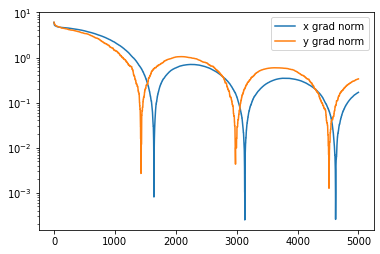

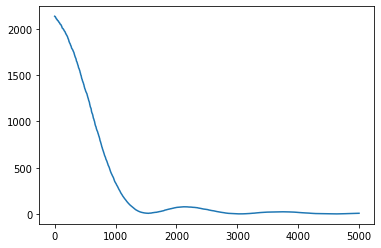

In [5]:
test_algo_by_problem(test_problem=problem_2, algo_func=ACRCD, L1_init=problem_2.La, L2_init=problem_2.Lb)

## ACRCD - неправильные L

100%|██████████| 5000/5000 [00:01<00:00, 2552.32it/s]


start f val:  0.0
result val:  1.9254943501823136e+282
grad x norm:  1.962393615043788e+142
grad y norm:  0.09990815809740089
solver/analytic f*:  -2136.6387019107874
start, end L1:  50.0 50.0
start, end L2:  10 10


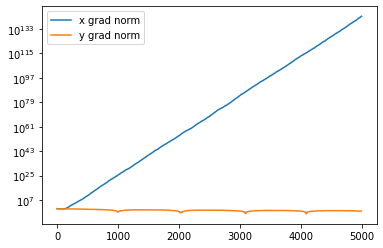

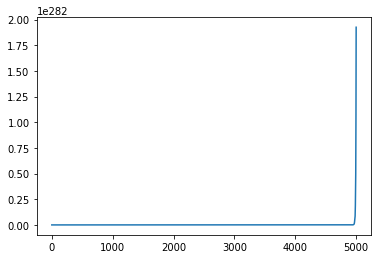

In [6]:
test_algo_by_problem(test_problem=problem_2, algo_func=ACRCD, L1_init=problem_2.La/2, L2_init=problem_2.Lb)

## ACRCD* - неправильные L

100%|██████████| 5000/5000 [00:05<00:00, 906.95it/s]


start f val:  0.0
result val:  -2136.624294937921
grad x norm:  0.01710156022491982
grad y norm:  0.008674935423402825
solver/analytic f*:  -2136.6387019107874
start, end L1:  50.0 12.5
start, end L2:  10 2.5


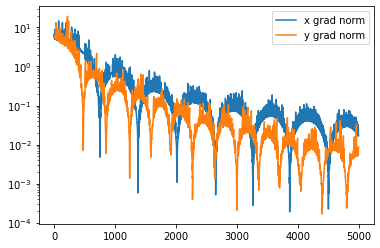

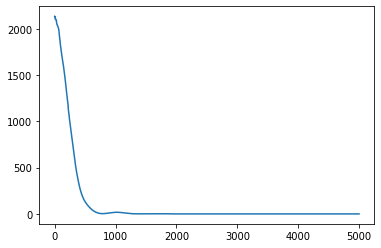

In [7]:
test_algo_by_problem(test_problem=problem_2, algo_func=ACRCD_star, L1_init=problem_2.La/2, L2_init=problem_2.Lb)

# Первая задача (решается солвером)
# ACRCD

100%|██████████| 5000/5000 [00:03<00:00, 1444.74it/s]


start f val:  -0.009782673791050911
result val:  0.83881074
grad x norm:  16.531113
grad y norm:  6.271242
solver/analytic f*:  -0.09913493432146778
start, end L1:  100 100
start, end L2:  100 100


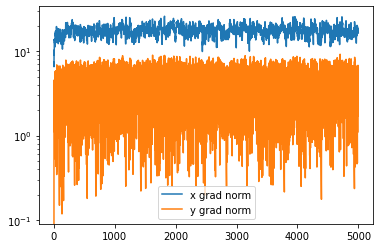

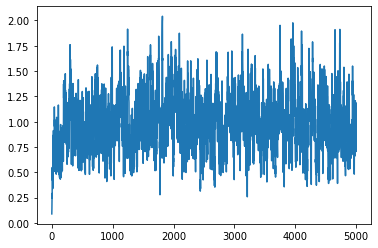

In [8]:
test_algo_by_problem(test_problem=problem_1, algo_func=ACRCD, L1_init=100, L2_init=100)

100%|██████████| 5000/5000 [00:06<00:00, 778.09it/s]


start f val:  -0.009782673791050911
result val:  -0.09913492
grad x norm:  0.0020384747
grad y norm:  0.002005721
solver/analytic f*:  -0.09913493432146778
start, end L1:  100 400.0
start, end L2:  100 100.0


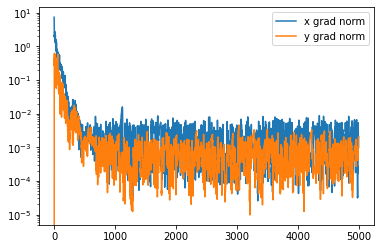

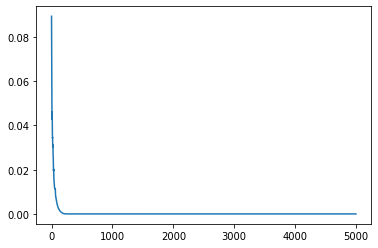

In [9]:
test_algo_by_problem(test_problem=problem_1, algo_func=ACRCD_star, L1_init=100, L2_init=100)